# Basic Linear Regression Model with Tensorflow 2.0
## Reference
https://towardsdatascience.com/get-started-with-tensorflow-2-0-and-linear-regression-29b5dbd65977

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

## Data
Probability of college admission

In [2]:
data = pd.read_csv( '../data/Admission_Predict.csv' )
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


## Split the Data

In [4]:
continuous_features = data[ ['GRE Score','TOEFL Score','University Rating','SOP','LOR ','CGPA'] ].values / 100 
categorical_research_features = data[ [ 'Research' ] ].values 

In [5]:
X = np.concatenate( [ continuous_features , categorical_research_features ] , axis=1 )
Y = data[ [ 'Chance of Admit ' ] ].values

In [6]:
train_features, test_features, train_labels, test_labels = train_test_split(X, Y, test_size=0.2)

In [7]:
X = tf.constant(train_features, dtype=tf.float32)
Y = tf.constant(train_labels, dtype=tf.float32)

In [8]:
test_X = tf.constant(test_features , dtype=tf.float32)
test_Y = tf.constant(test_labels , dtype=tf.float32)

## Define the Model

### Error Function

In [9]:
def mean_squared_error( Y , y_pred ):
    return tf.reduce_mean( tf.square( y_pred - Y ) )

def mean_squared_error_deriv( Y , y_pred ):
    return tf.reshape( tf.reduce_mean( 2 * ( y_pred - Y ) ) , [ 1 , 1 ] )

### Regression Function

In [11]:
def h ( X , weights , bias ):
    return tf.tensordot( X , weights , axes=1 ) + bias

## Training
### Hyperparameters

In [12]:
num_epochs = 10
num_samples = X.shape[0]
batch_size = 10
learning_rate = 0.001

In [13]:
### Start batch training...

Loss is 26.516809463500977
Loss is 12.856149673461914
Loss is 6.2688775062561035
Loss is 3.0935606956481934
Loss is 1.5583287477493286
Loss is 0.8138726353645325
Loss is 0.45281893014907837
Loss is 0.27660083770751953
Loss is 0.1897885650396347
Loss is 0.14711575210094452


Matplotlib is building the font cache; this may take a moment.


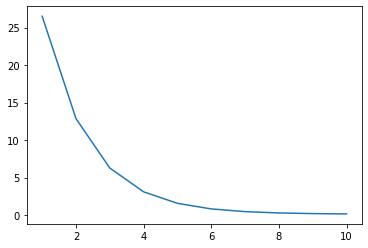

In [20]:
dataset = tf.data.Dataset.from_tensor_slices(( X , Y )) 
dataset = dataset.shuffle( 500 ).repeat( num_epochs ).batch( batch_size )
iterator = dataset.__iter__()

num_features = X.shape[1]
weights = tf.random.normal( ( num_features , 1 ) ) 
bias = 0

epochs_plot = list()
loss_plot = list()

for i in range( num_epochs ) :
    
    epoch_loss = list()
    for b in range( int(num_samples/batch_size) ):
        x_batch , y_batch = iterator.get_next()
   
        output = h( x_batch , weights , bias ) 
        loss = epoch_loss.append( mean_squared_error( y_batch , output ).numpy() )
    
        dJ_dH = mean_squared_error_deriv( y_batch , output)
        dH_dW = x_batch
        dJ_dW = tf.reduce_mean( dJ_dH * dH_dW )
        dJ_dB = tf.reduce_mean( dJ_dH )
    
        weights -= ( learning_rate * dJ_dW )
        bias -= ( learning_rate * dJ_dB ) 
        
    loss = np.array( epoch_loss ).mean()
    epochs_plot.append( i + 1 )
    loss_plot.append( loss ) 
    
    print( 'Loss is {}'.format( loss ) )
    
    
import matplotlib.pyplot as plt
plt.plot( epochs_plot , loss_plot ) 
plt.show()